### Name: Samuel McKay

In [216]:
import openseespy.opensees as ops
import opsvis as opsv

In [217]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Strong axis bending (about the z axis) with fibers defined through the WFSection2d command

#### W10x54 wide flange section

In [218]:
# Assumed units: kip, in, ksi

# Material properties
Fy = 50
Es = 29000

# Section dimensions from Steel Manual
d = 10.1
bf = 10
tw = 0.370
tf = 0.615

# Axial load (positive is compression)
N = 0

WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


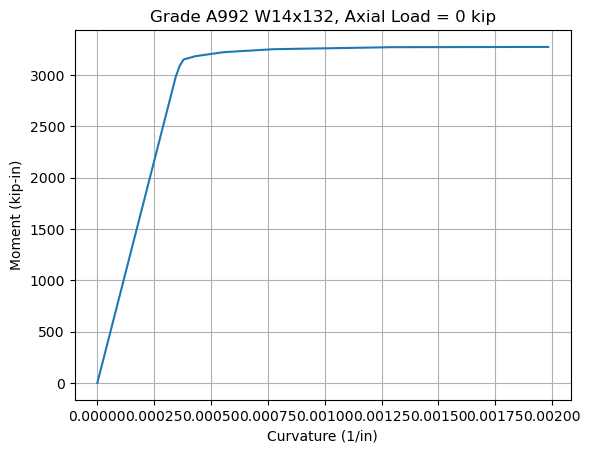

In [219]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

ops.node(1,0,0)
ops.node(2,0,0)

ops.fix(1,1,1,1)
ops.fix(2,0,1,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0)

ops.section('WFSection2d',1,1,d,tw,bf,tf,10,2)


ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0,0)

ops.integrator('LoadControl',0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*d # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0,0,1)

deps = 0.01*epsY
ops.integrator('DisplacementControl',2,3,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])
    
plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W14x132, Axial Load = %d kip' % N)
plt.grid()
plt.show()

### Check against values in Steel Manual

In [220]:
# Section and plastic modulus
S = 60
Z = 66.6

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print(My,Mp)

3000 3329.9999999999995


### 2. Strong axis bending with fibers defined using the patch command

In [221]:
# Assumed units: kip, in, ksi

# Material properties
Fy = 50
Es = 29000

# Section dimensions from Steel Manual
d = 10.1
bf = 10
tw = 0.370
tf = 0.615

# Axial load (positive is compression)
N = 0

WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


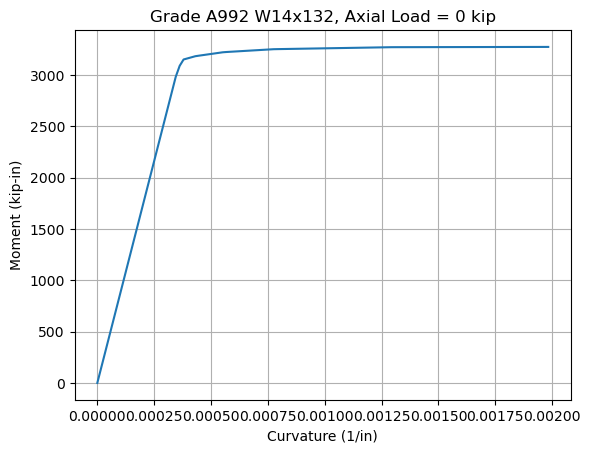

In [222]:
ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

ops.node(1,0.0,0.0)
ops.node(2,0.0,0.0)

ops.fix(1,1,1,1)
ops.fix(2,0,1,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0)

ops.section('Fiber',1)
ops.patch('rect',1,2,1,0.5*d,0.5*bf,0.5*d-tf,-0.5*bf) # Top flange
ops.patch('rect',1,10,1,0.5*d-tf,0.5*tw,-0.5*d+tf,-0.5*tw) # Web
ops.patch('rect',1,2,1,-0.5*d+tf,0.5*bf,-0.5*d,-0.5*bf) # Bottom flange


ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0,0)

ops.integrator('LoadControl',0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*d # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0,0,1)

deps = 0.01*epsY
ops.integrator('DisplacementControl',2,3,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])

plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W14x132, Axial Load = %d kip' % N)
plt.grid()
plt.show()

### Check against values in Steel Manual

In [223]:
# Section and plastic modulus
S = 60
Z = 66.6

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print(My,Mp)

3000 3329.9999999999995


### 3. Weak axis bending with the section discretized along both the y and z axes using the patch command

In [224]:
# Assumed units: kip, in, ksi

# Material properties
Fy = 50
Es = 29000

v = 0.3
G = 0.5*Es/(1+v)
J = 1.82

# Section dimensions from Steel Manual
d = 10.1
bf = 10
tw = 0.370
tf = 0.615

# Axial load (positive is compression)
N = 0

WARNING analysis Static - no Algorithm yet specified, 
 NewtonRaphson default will be used
WARNING analysis Static - no ConstraintHandler yet specified, 
 PlainHandler default will be used
WARNING analysis Static - no Numberer specified, 
 RCM default will be used
WARNING analysis Static - no LinearSOE specified, 
 ProfileSPDLinSOE default will be used


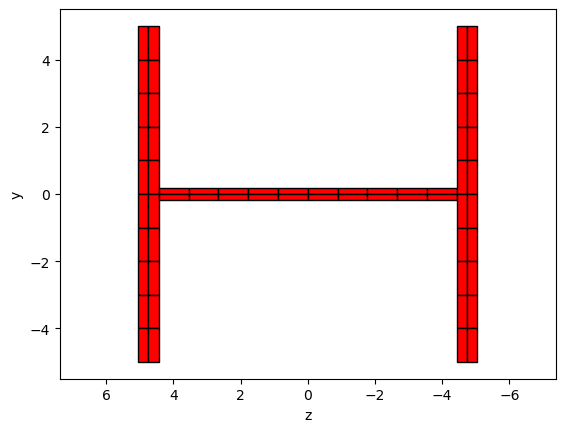

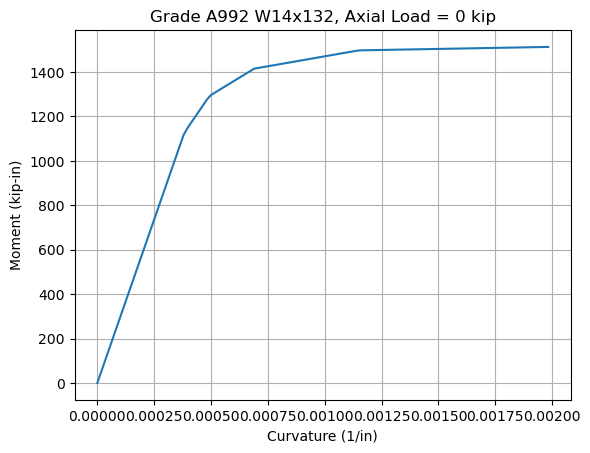

In [225]:
ops.wipe()
ops.model('basic','-ndm',3,'-ndf',6)

ops.node(1,0,0,0)
ops.node(2,0,0,0)

ops.fix(1,1,1,1,1,1,1)
ops.fix(2,0,1,1,0,0,0)

ops.uniaxialMaterial('Steel01',1,Fy,Es,0)

ops.section('Fiber',1,'-GJ',G*J)
ops.patch('rect',1,10,2,0.5*bf,0.5*d,-0.5*bf,0.5*d-tf) # Top flange
ops.patch('rect',1,2,10,0.5*tw,0.5*d-tf,-0.5*tw,-0.5*d+tf) # Web
ops.patch('rect',1,10,2,0.5*bf,-0.5*d+tf,-0.5*bf,-0.5*d) # Bottom flange


ops.element('zeroLengthSection',1,1,2,1)


ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.load(2,-N,0,0,0,0,0)

ops.integrator('LoadControl',0)
ops.analysis('Static')

ops.analyze(1)

epsY = Fy/Es
epsMax = 0.01

y = -0.5*d # depth to extreme tension fiber
e = ops.eleResponse(1,'section','deformation')
eps = e[0] - y*e[1]

ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
ops.load(2,0,0,0,0,0,1)

deps = 0.01*epsY
ops.integrator('DisplacementControl',2,6,deps)

Mplot = np.zeros(1)
Kplot = np.zeros(1)

while eps < epsMax:
    ok = ops.analyze(1)
    if ok < 0:
        break
    
    e = ops.eleResponse(1,'section','deformation')
    eps = e[0] - y*e[1]
    
    Mplot = np.append(Mplot,ops.getLoadFactor(2))
    Kplot = np.append(Kplot,e[1])    


fib_sec_1 = [['section','Fiber',2,'-GJ',G*J],
            ['patch','rect',1,10,2,0.5*bf,0.5*d,-0.5*bf,0.5*d-tf],
            ['patch','rect',1,2,10,0.5*tw,0.5*d-tf,-0.5*tw,-0.5*d+tf],
            ['patch','rect',1,10,2,0.5*bf,-0.5*d+tf,-0.5*bf,-0.5*d]]


opsv.fib_sec_list_to_cmds(fib_sec_1)
matcolor = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')

plt.figure()
plt.plot(Kplot,Mplot)
plt.xlabel('Curvature (1/in)')
plt.ylabel('Moment (kip-in)')
plt.title('Grade A992 W14x132, Axial Load = %d kip' % N)
plt.grid()
plt.show()

### Check against values in Steel Manual

In [226]:
# Section and plastic modulus
S = 20.6
Z = 31.3

# Yield and plastic moment
My = Fy*S
Mp = Fy*Z

print(My,Mp)

1030.0 1565.0
